In [1]:
#Load Data
train <- read.csv("../input/big-mart-sales-prediction/Train.csv")

In [2]:
#Look at data
str(train)

'data.frame':	8523 obs. of  12 variables:
 $ Item_Identifier          : Factor w/ 1559 levels "DRA12","DRA24",..: 157 9 663 1122 1298 759 697 739 441 991 ...
 $ Item_Weight              : num  9.3 5.92 17.5 19.2 8.93 ...
 $ Item_Fat_Content         : Factor w/ 5 levels "LF","low fat",..: 3 5 3 5 3 5 5 3 5 5 ...
 $ Item_Visibility          : num  0.016 0.0193 0.0168 0 0 ...
 $ Item_Type                : Factor w/ 16 levels "Baking Goods",..: 5 15 11 7 10 1 14 14 6 6 ...
 $ Item_MRP                 : num  249.8 48.3 141.6 182.1 53.9 ...
 $ Outlet_Identifier        : Factor w/ 10 levels "OUT010","OUT013",..: 10 4 10 1 2 4 2 6 8 3 ...
 $ Outlet_Establishment_Year: int  1999 2009 1999 1998 1987 2009 1987 1985 2002 2007 ...
 $ Outlet_Size              : Factor w/ 4 levels "","High","Medium",..: 3 3 3 1 2 3 2 3 1 1 ...
 $ Outlet_Location_Type     : Factor w/ 3 levels "Tier 1","Tier 2",..: 1 3 1 3 3 3 3 3 2 2 ...
 $ Outlet_Type              : Factor w/ 4 levels "Grocery Store",..: 2 3 2 1 2 3 

In [3]:
summary(train)

 Item_Identifier  Item_Weight     Item_Fat_Content Item_Visibility  
 FDG33  :  10    Min.   : 4.555   LF     : 316     Min.   :0.00000  
 FDW13  :  10    1st Qu.: 8.774   low fat: 112     1st Qu.:0.02699  
 DRE49  :   9    Median :12.600   Low Fat:5089     Median :0.05393  
 DRN47  :   9    Mean   :12.858   reg    : 117     Mean   :0.06613  
 FDD38  :   9    3rd Qu.:16.850   Regular:2889     3rd Qu.:0.09459  
 FDF52  :   9    Max.   :21.350                    Max.   :0.32839  
 (Other):8467    NA's   :1463                                       
                 Item_Type       Item_MRP      Outlet_Identifier
 Fruits and Vegetables:1232   Min.   : 31.29   OUT027 : 935     
 Snack Foods          :1200   1st Qu.: 93.83   OUT013 : 932     
 Household            : 910   Median :143.01   OUT035 : 930     
 Frozen Foods         : 856   Mean   :140.99   OUT046 : 930     
 Dairy                : 682   3rd Qu.:185.64   OUT049 : 930     
 Canned               : 649   Max.   :266.89   OUT045 : 92

In [4]:
#check variable classes
sapply(train, class)

Item_Identifier               Item_Weight          Item_Fat_Content 
                 "factor"                 "numeric"                  "factor" 
          Item_Visibility                 Item_Type                  Item_MRP 
                "numeric"                  "factor"                 "numeric" 
        Outlet_Identifier Outlet_Establishment_Year               Outlet_Size 
                 "factor"                 "integer"                  "factor" 
     Outlet_Location_Type               Outlet_Type         Item_Outlet_Sales 
                 "factor"                  "factor"                 "numeric"

In [5]:
#Install and Load Library
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Q1. How to create a Scatter Plot ?

**When to use:** Scatter Plot is used when want to see the relationship between two continuous variables.

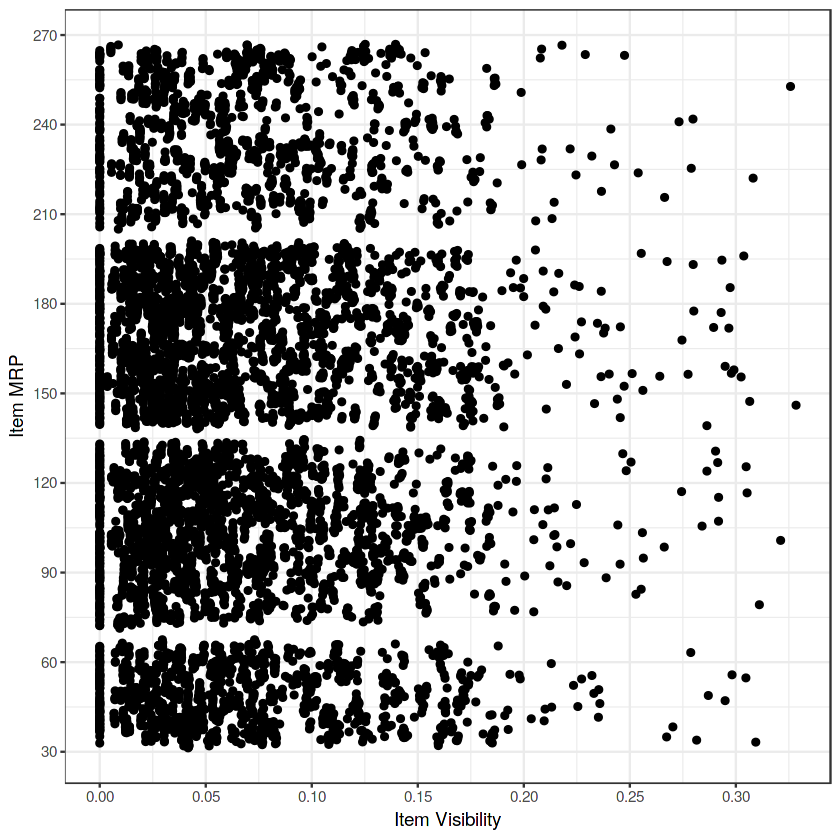

In [6]:
ggplot(train, aes(Item_Visibility, Item_MRP)) + geom_point() +
         scale_x_continuous("Item Visibility", breaks = seq(0,0.35,0.05))+
         scale_y_continuous("Item MRP", breaks = seq(0,270,by = 30))+
         theme_bw()

Let’s quickly understand the structure of ggplot code:

1. aes – refers to aesthetics. It includes variable names used to create plots.
2. geom_point – ggplot offers many ‘geoms’ which are used to represent data. Since, we are interested here in scatter plot, we used geom_points.
3. scale_x_continuous – x variable is continuous. This parameter is used to alter information represented at x axis.
4. scale_y_continuous – It performs the same task as scale_x_continuous but for y axis.
5. theme_bw – It refers to setting the background of plots. I used the grid version.


We can also add a categorical variable (Item_Type) in the current plot. Do check the data to get familiar with the available in the data set.

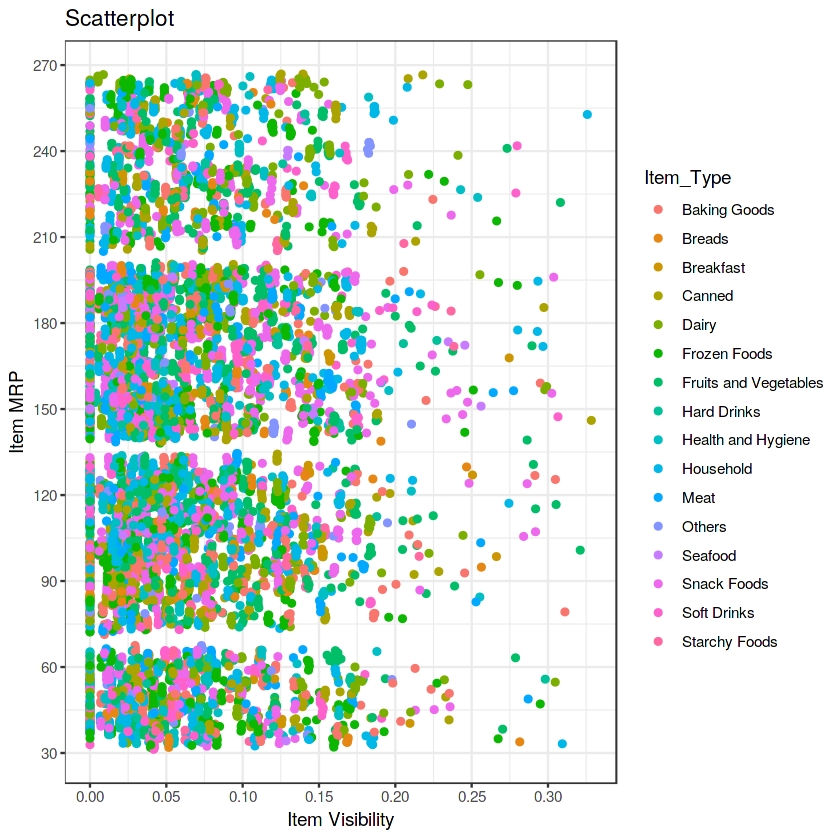

In [7]:
ggplot(train, aes(Item_Visibility, Item_MRP)) + geom_point(aes(color = Item_Type)) +
                scale_x_continuous("Item Visibility", breaks = seq(0,0.35,0.05))+
                scale_y_continuous("Item MRP", breaks = seq(0,270,by = 30))+
                theme_bw() + labs(title="Scatterplot")

We can even make it better by creating separate scatter plot for separate Item_Type.

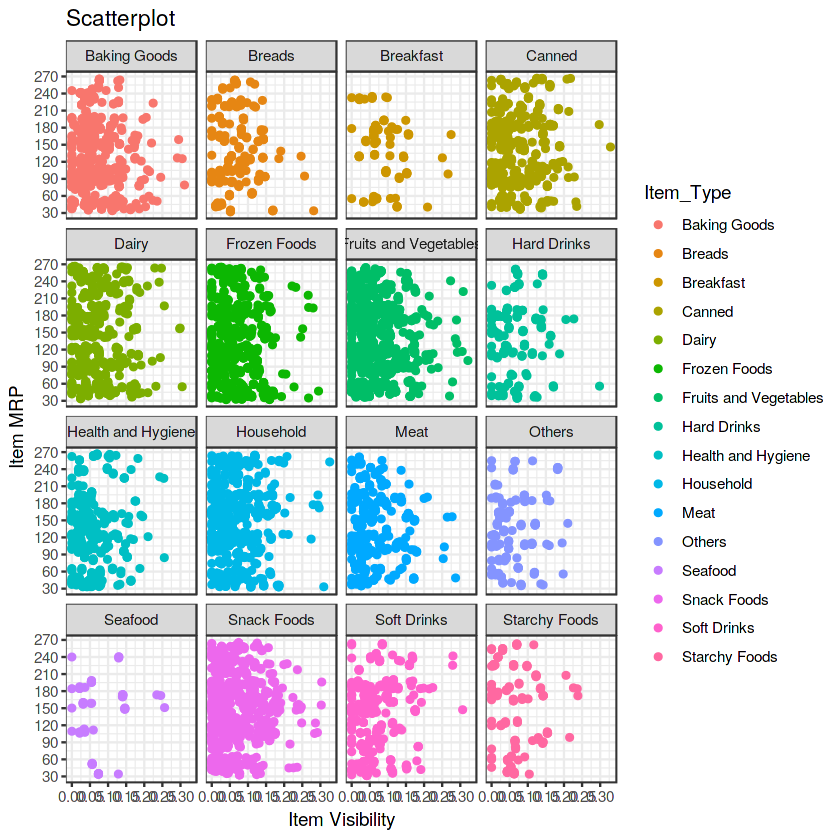

In [8]:
ggplot(train, aes(Item_Visibility, Item_MRP)) + geom_point(aes(color = Item_Type)) +
                scale_x_continuous("Item Visibility", breaks = seq(0,0.35,0.05))+
                scale_y_continuous("Item MRP", breaks = seq(0,270,by = 30))+ 
                theme_bw() + labs(title="Scatterplot") + facet_wrap( ~ Item_Type)

In this case, the parameter facet_wrap does the trick. It wraps facet in rectangular layout

# Q2 . How to create a Histogram ?

**When to use:** Histogram is used when we want to plot one continuous variable.

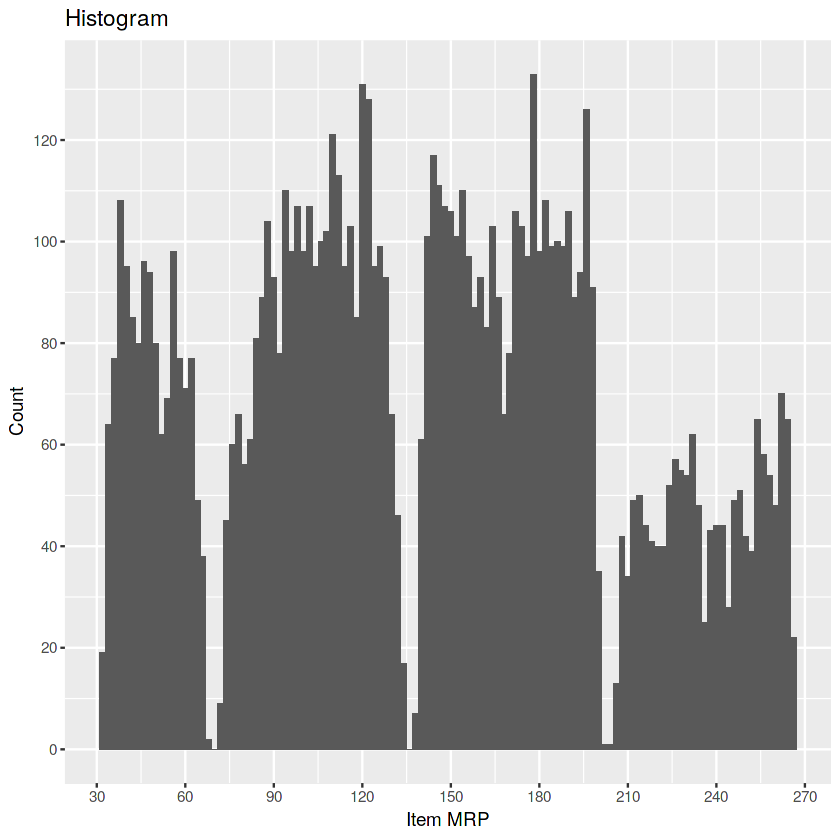

In [9]:
ggplot(train, aes(Item_MRP)) + geom_histogram(binwidth = 2)+
                scale_x_continuous("Item MRP", breaks = seq(0,270,by = 30))+
                scale_y_continuous("Count", breaks = seq(0,200,by = 20))+ labs(title = "Histogram")

# Q3. How to create a  Bar Chart ?

**When to use:** Bar Chart is used when we want to plot a categorical variable or a combination of continuous and categorical variable.

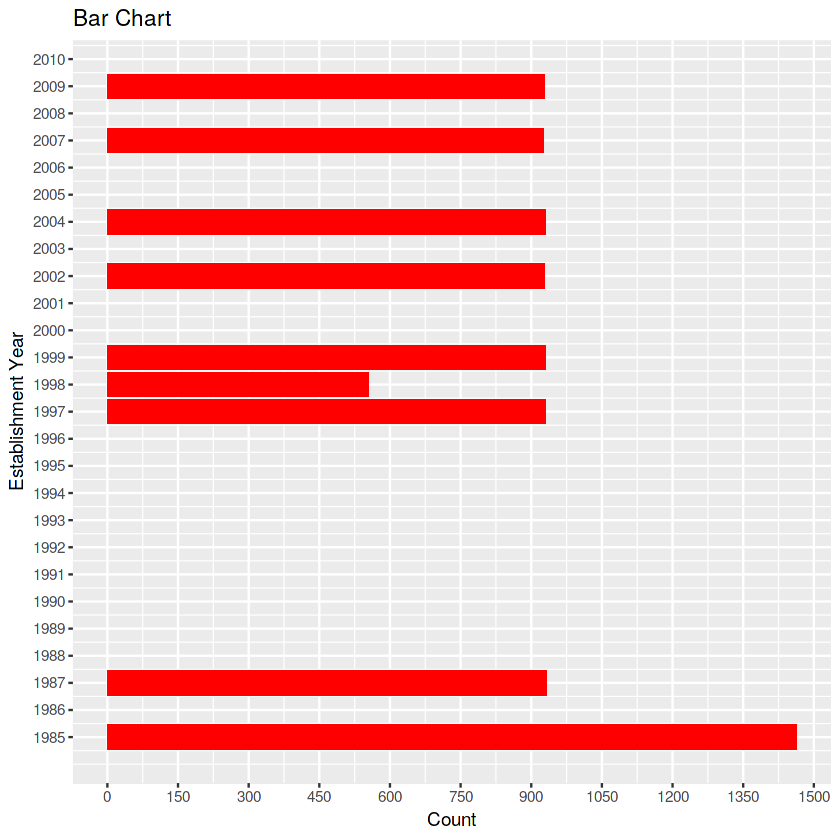

In [10]:
#Bar chart with one variable
#coord_polar
ggplot(train, aes(Outlet_Establishment_Year)) + geom_bar(fill = "red")+theme_bw()+
                scale_x_continuous("Establishment Year", breaks = seq(1985,2010)) +
                scale_y_continuous("Count", breaks = seq(0,1500,150)) + 
                coord_flip()+ labs(title = "Bar Chart") + theme_gray()

You can remove coord_flip() parameter to get this bar chart vertically. As you can see, I tried a different theme for this plot. You are always welcome to become experimental while using ggplot package.

Warning message:
“Removed 1463 rows containing missing values (position_stack).”


ERROR: Error: Cannot use `+.gg()` with a single argument. Did you accidentally put + on a new line?


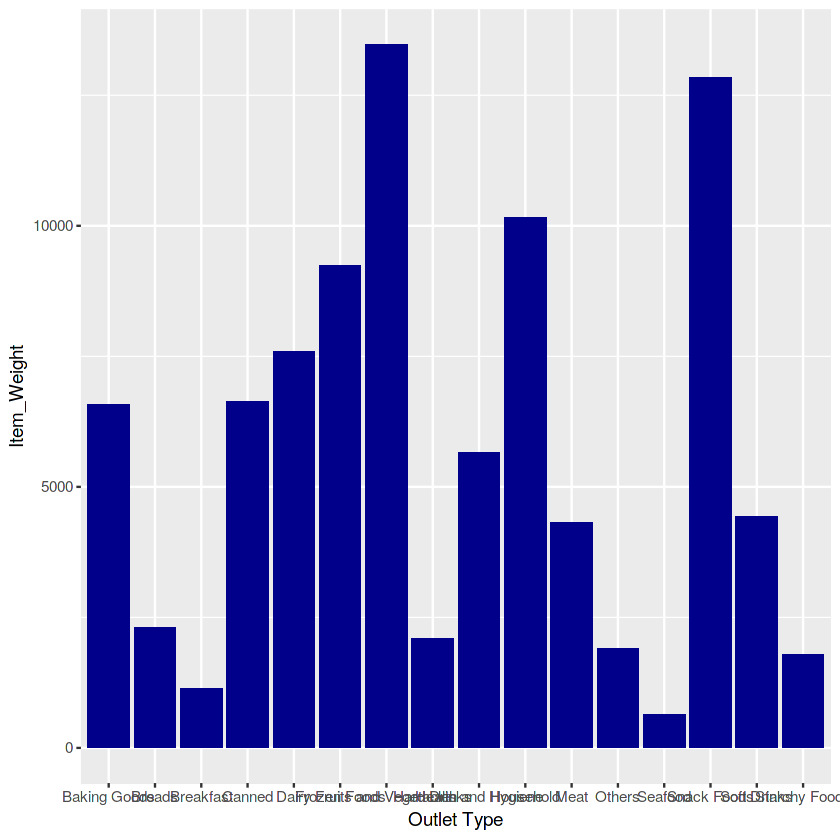

In [11]:
#Bar Chart with 2 variables
ggplot(train, aes(Item_Type, Item_Weight)) + geom_bar(stat = "identity", fill = "darkblue") + scale_x_discrete("Outlet Type")
+ scale_y_continuous("Item Weight", breaks = seq(0,15000, by = 500))
         + theme(axis.text.x = element_text(angle = 90, vjust = 0.5))
         + labs(title = "Bar Chart")

In this graph, I used categorical vs continuous variable on x and y axis respectively.

# Q4. How to create a Stack Bar Chart ?

**When to use:** It’s an advanced version of a Bar Chart. It used when we wish to visualize a combination of categorical variables.

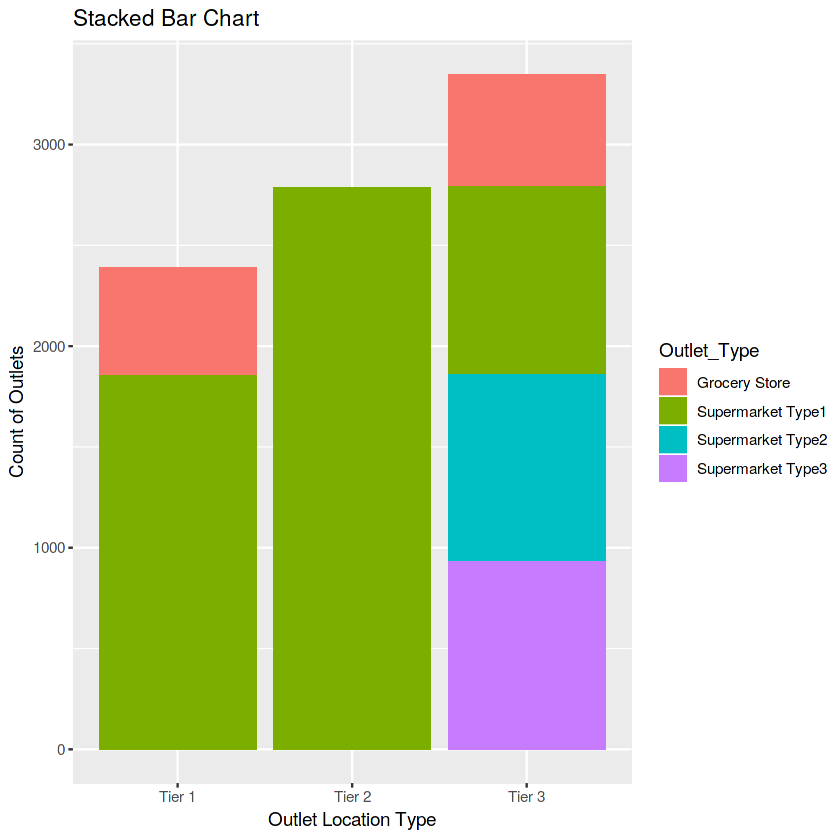

In [12]:
ggplot(train, aes(Outlet_Location_Type, fill = Outlet_Type)) + geom_bar()+
         labs(title = "Stacked Bar Chart", x = "Outlet Location Type", y = "Count of Outlets")

# Q5. How to create a Box Plot ?

**When to use:** Box Plots are used to plot a combination of categorical and continuous variables. This plot helps us to identify data distribution and detect outliers.

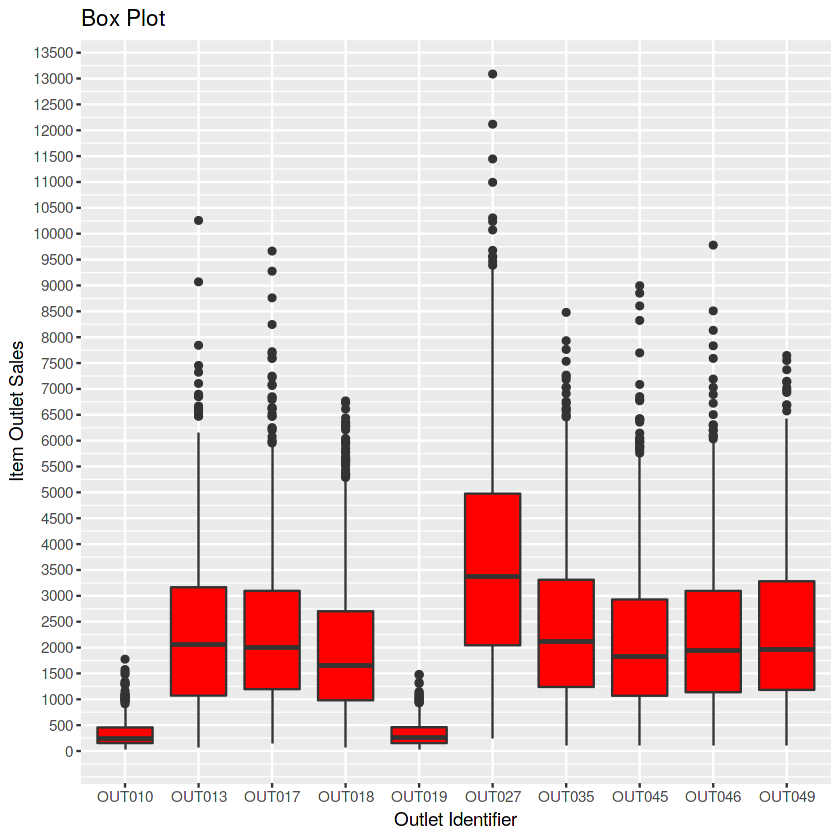

In [13]:
ggplot(train, aes(Outlet_Identifier, Item_Outlet_Sales)) + geom_boxplot(fill = "red")+
                scale_y_continuous("Item Outlet Sales", breaks= seq(0,15000, by=500))+
                labs(title = "Box Plot", x = "Outlet Identifier")

The black points are outliers. Outlier detection and removal is an essential step of successful data exploration.

# Q6. How to create an Area Chart ?

**When to use:** Area chart is used to show continuity across a variable or data set. It’s quite similar to a line chart. It is commonly used for time series plots. Alternatively, it is used to plot continuous variables and analyze the underlying trends.

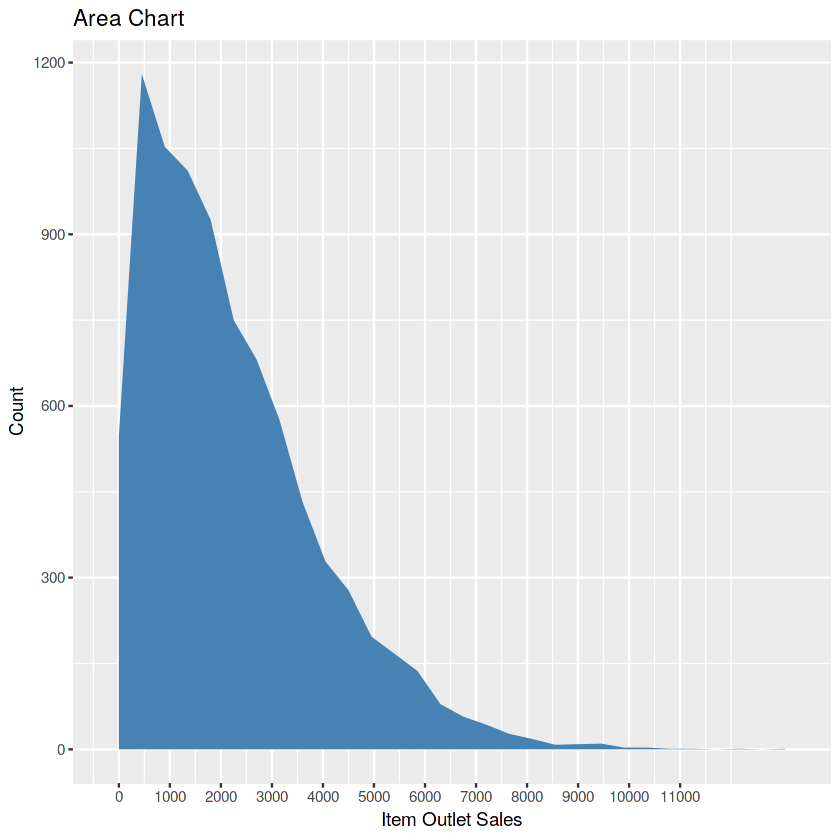

In [14]:
ggplot(train, aes(Item_Outlet_Sales)) + geom_area(stat = "bin", bins = 30, fill ="steelblue") +
         scale_x_continuous(breaks = seq(0,11000,1000))+
         labs(title = "Area Chart", x = "Item Outlet Sales", y = "Count")

# Q7. How to create a heat map ?

**When to use:** Heat Map uses intensity (density) of colors to display relationship between two or three or many variables in a two dimensional image.

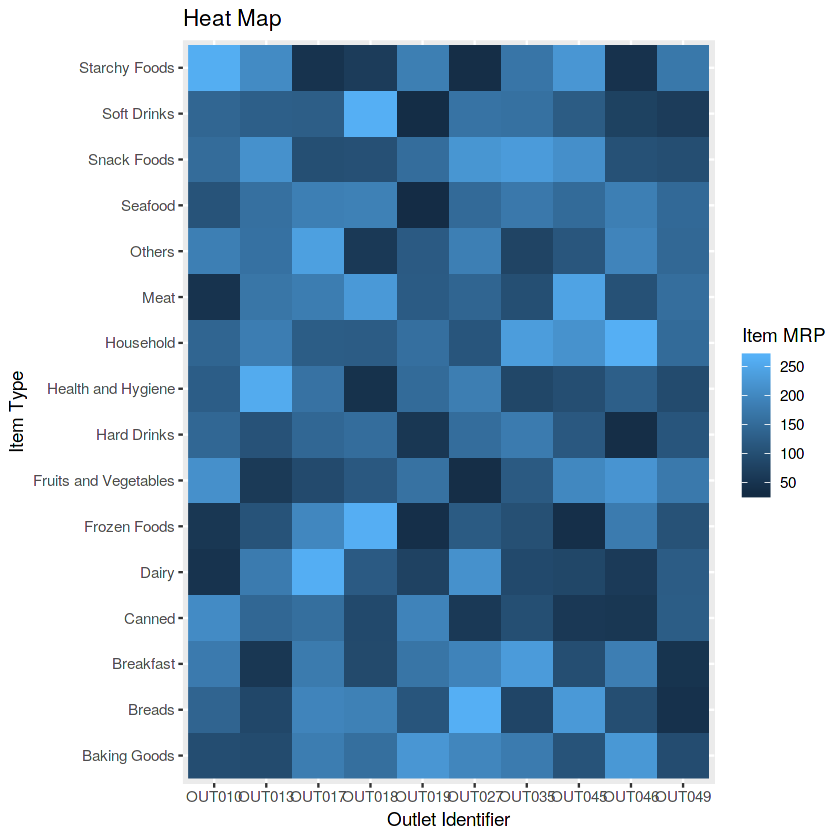

In [15]:
ggplot(train, aes(Outlet_Identifier, Item_Type))+
               geom_raster(aes(fill = Item_MRP))+
               labs(title ="Heat Map", x = "Outlet Identifier", y = "Item Type")+
               scale_fill_continuous(name = "Item MRP")

The dark portion indicates Item MRP is close 50. The brighter portion indicates Item MRP is close to 250.

Heat Maps can also produce visuals used for image recognition. This can be done by adding a parameter as interpolate = TRUE.

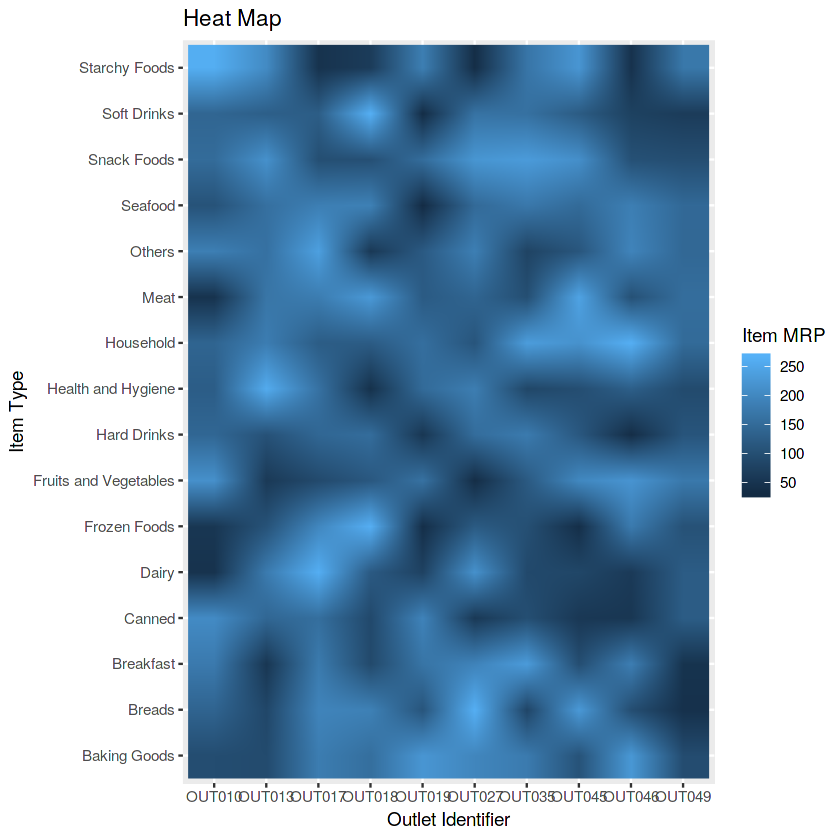

In [16]:
ggplot(train, aes(Outlet_Identifier, Item_Type))+
                geom_raster(aes(fill = Item_MRP), interpolate = T)+
                labs(title ="Heat Map", x = "Outlet Identifier", y = "Item Type")+
                scale_fill_continuous(name = "Item MRP")

# Q8. How to create a Correlogram ?

**When to use:** Correlogram is used to test the level of correlation among the variable available in the data set.


To create a correlogram, I’ve used corrgram package instead of ggplot. I realized creating correlogram using its dedicated package is much easier than using ggplot.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus



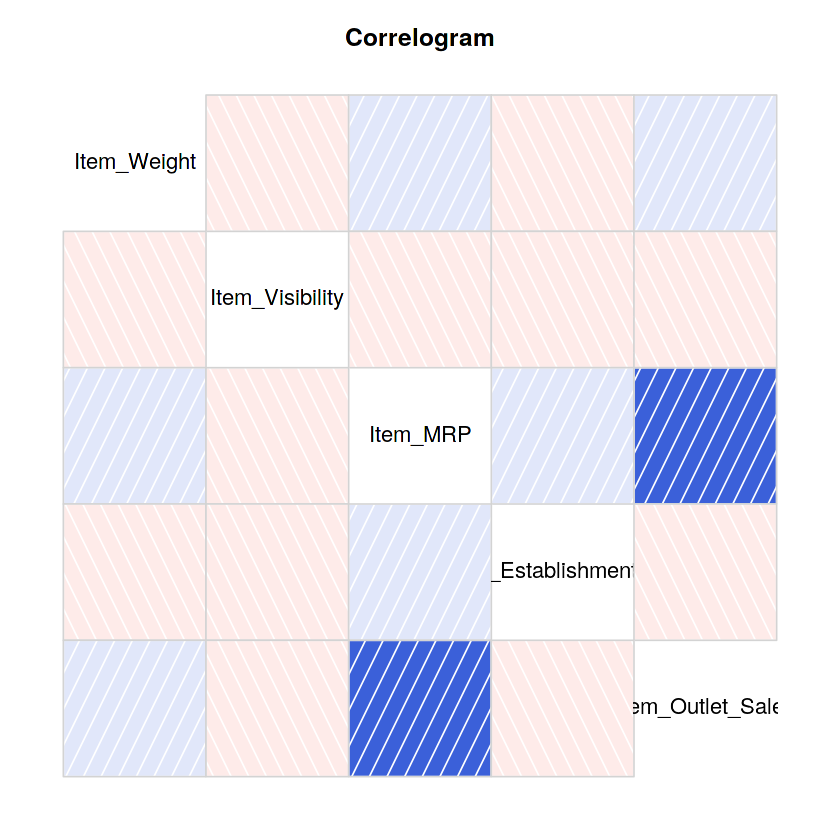

In [17]:
install.packages("corrgram")
library(corrgram)
corrgram(train, order=NULL,
           panel=panel.shade, text.panel=panel.txt,
           main="Correlogram")

It’s quite easy to interpret too. Darker the color, higher the correlation between variables. Blue indicates positive correlation. Red indicates negative correlation. Color intensity indicates the magnitude of correlation.

# Q9.How to plot a data set in single command ?

Everyone of us tries doing this step at some point in time. We all look for one command using which we can plot all variables in the data set at once. Here’s your answer.

You can use tabplot() package to accomplish this feat.

In [18]:
#plot data 
install.packages("tabplot")
library(tabplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: bit

Attaching package bit

package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)

creators: bit bitwhich

coercion: as.logical as.integer as.bit as.bitwhich which

operator: ! & | xor != ==

querying: print length any all min max range sum summary

bit access: length<- [ [<- [[ [[<-

for more help type ?bit


Attaching package: ‘bit’


The following object is masked from ‘package:base’:

    xor


Loading required package: ff

Attaching package ff

- getOption("fftempdir")=="/tmp/RtmpkOmiFV"


- getOption("ffextension")=="ff"


- getOption("ffdrop")==TRUE


- getOption("fffinonexit")==TRUE


- getOption("ffpagesize")==65536


- getOption("ffcaching")=="mmnoflush"  -- consider "ffeachflush" if your system stalls on large writes


- getOption("ffbatchbytes")==16777216 -- consider a different value for tuning your system


- getOption("ffmaxbytes")==536870912 -- consider a differen

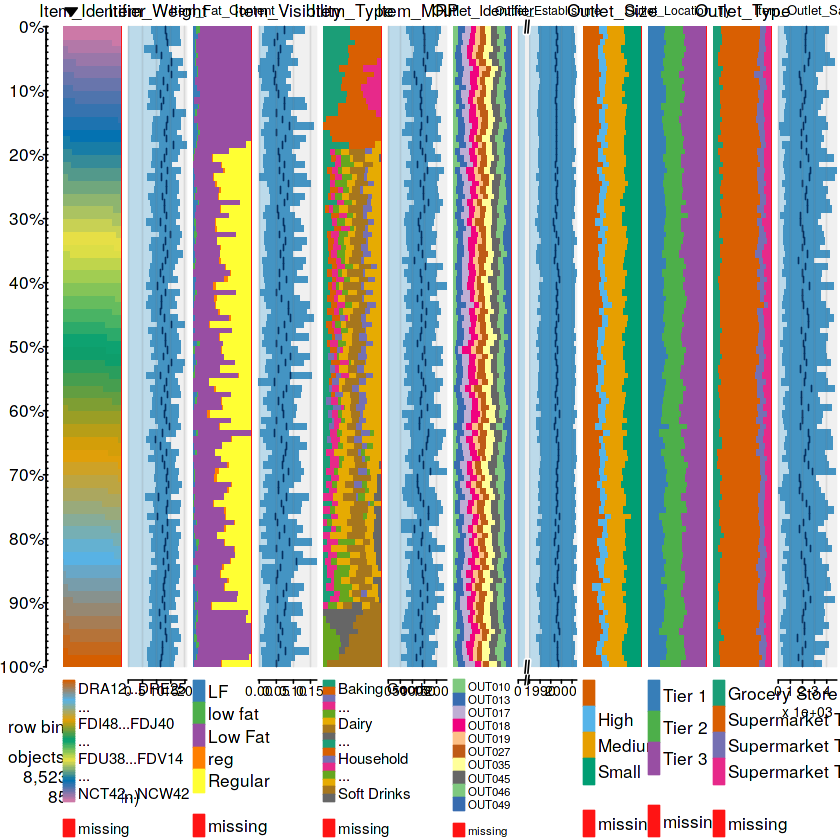

In [19]:
tableplot(train)

# End Notes

This end of a colorful journey! I hope it enables people to starts several new colorful journeys. You might have noticed that using ggplot2 is a lot easier. Most of the codes are repetitive, hence you will quickly get used to it. You need to be careful about picking up “geoms” for the charts, because that’s the main design element. When I started learning this package, I asked all these questions at different point in time. Hence, the idea to line up all questions in one article came to me.

In this article, I discussed 9 types of different visualizations which can be plotted using ggplot package. These visualizations are best used depending on the type of variable supplied to them. Hence, you must be careful about the type of variable you wish to plot.

In [20]:
df = read.csv('../input/fitness/2018-01-29.csv')
head(df)

Warning message in file(file, "rt"):
“cannot open file '../input/fitness/2018-01-29.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection
